<a href="https://colab.research.google.com/github/Hideki-Iwaki-TUS/FinancialMath/blob/main/FinancialMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# prompt: yahoo financeから2020年1月〜2020年12月までの月次終値，日経平均株価と米ドル円為替レートを取得してデータ・フレームにする．

import yfinance as yf
import pandas as pd

# 日経平均株価のティッカーシンボル
nikkei_ticker = "^N225"

# 米ドル円の為替レートのティッカーシンボル
usd_jpy_ticker = "USDJPY=X"

# データ取得期間
start_date = "2020-01-01"
end_date = "2020-12-31"

# データ取得
nikkei_data = yf.download(nikkei_ticker, start=start_date, end=end_date, interval="1mo")
usd_jpy_data = yf.download(usd_jpy_ticker, start=start_date, end=end_date, interval="1mo")

# 月末の終値のみを抽出
# Access 'Adj Close' using MultiIndex if it exists
try:
    nikkei_monthly = nikkei_data[('Adj Close', nikkei_ticker)].resample("M").last()
    usd_jpy_monthly = usd_jpy_data[('Adj Close', usd_jpy_ticker)].resample("M").last()
except KeyError:
    # Fallback to 'Close' if 'Adj Close' is not in MultiIndex
    nikkei_monthly = nikkei_data["Close"].resample("M").last()
    usd_jpy_monthly = usd_jpy_data["Close"].resample("M").last()

# データフレームの作成
df = pd.DataFrame({
    "Nikkei225": nikkei_monthly,
    "USDJPY": usd_jpy_monthly
})

# 結果の表示
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-38-50a78afd25a3>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nikkei_monthly = nikkei_data["Close"].resample("M").last()
<ipython-input-38-50a78afd25a3>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usd_jpy_monthly = usd_jpy_data["Close"].resample("M").last()


ValueError: If using all scalar values, you must pass an index

In [39]:
# prompt: yahoo financeから2020年1月〜2020年12月までの月次終値，日経平均株価と米ドル円為替レートを取得してデータ・フレームにする．

import yfinance as yf
import pandas as pd

# 日経平均株価のティッカーシンボル
nikkei_ticker = "^N225"

# 米ドル円の為替レートのティッカーシンボル
usd_jpy_ticker = "USDJPY=X"

# データ取得期間
start_date = "2020-01-01"
end_date = "2020-12-31"

# データ取得
nikkei_data = yf.download(nikkei_ticker, start=start_date, end=end_date, interval="1mo")
usd_jpy_data = yf.download(usd_jpy_ticker, start=start_date, end=end_date, interval="1mo")

# 月末の終値のみを抽出
# Access 'Adj Close' using MultiIndex if it exists
try:
    nikkei_monthly = nikkei_data[('Adj Close', nikkei_ticker)].resample("M").last()
    usd_jpy_monthly = usd_jpy_data[('Adj Close', usd_jpy_ticker)].resample("M").last()
except KeyError:
    # Fallback to 'Close' if 'Adj Close' is not in MultiIndex
    nikkei_monthly = nikkei_data["Close"].resample("M").last()
    usd_jpy_monthly = usd_jpy_data["Close"].resample("M").last()

# データフレームの作成
# nikkei_monthly and usd_jpy_monthly's index is used as the DataFrame's index
# Convert nikkei_monthly and usd_jpy_monthly to Series by squeezing
df = pd.DataFrame({
    "Nikkei225": nikkei_monthly.squeeze(),  # Convert to Series
    "USDJPY": usd_jpy_monthly.squeeze()   # Convert to Series
}, index=nikkei_monthly.index) # Pass the index explicitly


# 結果の表示
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-39-78c4f4f98b50>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nikkei_monthly = nikkei_data["Close"].resample("M").last()
<ipython-input-39-78c4f4f98b50>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usd_jpy_monthly = usd_jpy_data["Close"].resample("M").last()


,Nikkei225,USDJPY
Date,,
2020-01-31,23205.179688,108.876999
2020-02-29,21142.960938,108.136002
2020-03-31,18917.009766,108.035004
2020-04-30,20193.689453,106.610001
2020-05-31,21877.890625,107.760002
2020-06-30,22288.140625,107.589996
2020-07-31,21710.000000,104.682999
2020-08-31,23139.759766,105.535004
2020-09-30,23185.119141,105.664001


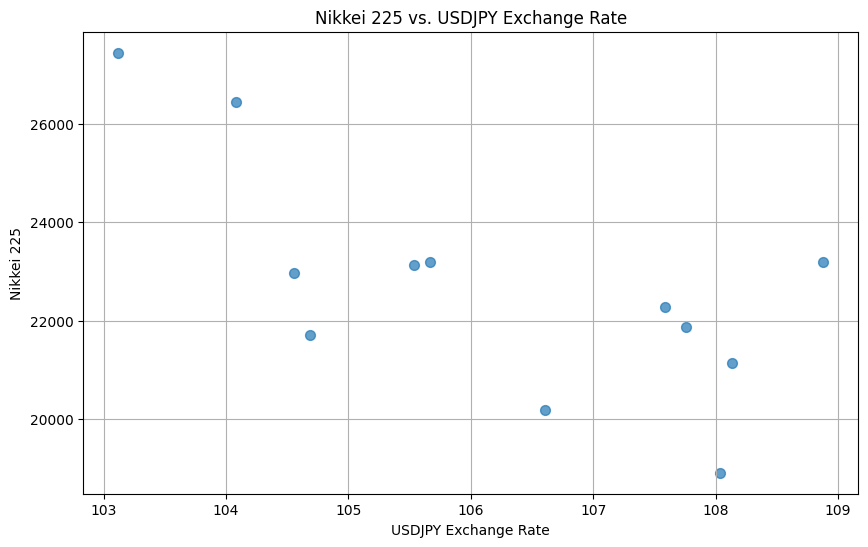

In [ ]:
# prompt: Nikkei225とUSDJPYの散布図を横軸を為替レートにして描く．

import matplotlib.pyplot as plt

# Assuming 'df' DataFrame from the previous code block is available

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df["USDJPY"], df["Nikkei225"], s=50, alpha=0.7) # x-axis: USDJPY, y-axis: Nikkei225
plt.xlabel("USDJPY Exchange Rate")
plt.ylabel("Nikkei 225")
plt.title("Nikkei 225 vs. USDJPY Exchange Rate")
plt.grid(True)
plt.show()


In [40]:
# prompt: Nikkei225とUSDJPYの共分散と相関係数を求める．

# 共分散と相関係数の計算
covariance = df["Nikkei225"].cov(df["USDJPY"])
correlation = df["Nikkei225"].corr(df["USDJPY"])

print(f"共分散: {covariance}")
print(f"相関係数: {correlation}")


共分散: -3046.42447210837
相関係数: -0.68547327656196


In [41]:
# prompt: 共分散の計算において，分母をデータ数として計算してください．

import numpy as np

# 共分散の計算（分母をデータ数で計算）
n = len(df)  # データ数
nikkei_mean = np.mean(df["Nikkei225"])
usd_jpy_mean = np.mean(df["USDJPY"])

covariance_n = np.sum((df["Nikkei225"] - nikkei_mean) * (df["USDJPY"] - usd_jpy_mean)) / n

print(f"共分散（分母をデータ数で計算）: {covariance_n}")


共分散（分母をデータ数で計算）: -2792.5557660993395


In [45]:
# prompt: 2017年9月から2022年8月までの日経平均月次終値を取得してください．

import yfinance as yf
import pandas as pd

# 日経平均株価のティッカーシンボル
nikkei_ticker = "^N225"

# データ取得期間
start_date = "2017-09-01"
end_date = "2022-08-31"

# データ取得
nikkei_data = yf.download(nikkei_ticker, start=start_date, end=end_date, interval="1mo")

# 月末の終値のみを抽出
# Access 'Close' using MultiIndex if it exists
nikkei_monthly = nikkei_data[('Close', nikkei_ticker)].resample("M").last()


# データフレームの作成
df = pd.DataFrame({"Nikkei225": nikkei_monthly})

# 結果の表示
df

[*********************100%***********************]  1 of 1 completed
<ipython-input-45-9d5302f75b4f>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nikkei_monthly = nikkei_data[('Close', nikkei_ticker)].resample("M").last()


,Nikkei225
Date,
2017-09-30,20356.279297
2017-10-31,22011.609375
2017-11-30,22724.960938
2017-12-31,22764.939453
2018-01-31,23098.289062
2018-02-28,22068.240234
2018-03-31,21454.300781
2018-04-30,22467.869141
2018-05-31,22201.820312


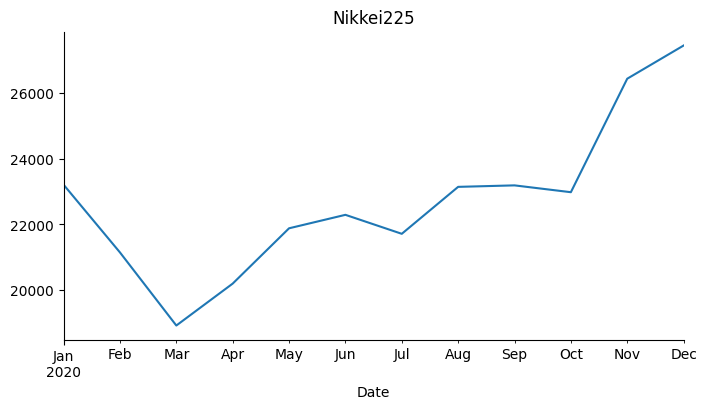

In [ ]:
# @title Nikkei225

from matplotlib import pyplot as plt
df['Nikkei225'].plot(kind='line', figsize=(8, 4), title='Nikkei225')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# グラフ内で日本語表記を可能にする．
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib # This import should work after installation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b57bbe6247a06b1e6d068b7bf9fec3927aec2f410ef40e82f1fe08637966590f
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
# prompt: Nikkei225のラグ１〜ラグ１０までの自己相関係数を求める．

from statsmodels.tsa.stattools import acf

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# 結果の表示
print("Nikkei225の自己相関係数:")
for lag, acf_value in enumerate(acf_values[1:]):  #ラグ0を除外
    print(f"ラグ {lag+1}: {acf_value}")


Nikkei225の自己相関係数:
ラグ 1: 0.5818092074679493
ラグ 2: 0.15477495849397324
ラグ 3: 0.11598860584793735
ラグ 4: 0.012291690978131122
ラグ 5: -0.12885577830577763
ラグ 6: -0.1408324346389961
ラグ 7: -0.2393814681363856
ラグ 8: -0.4225483779448613
ラグ 9: -0.38127319293773493
ラグ 10: -0.08979134541725133


In [ ]:
# prompt: 自己相関係数を求める式を表示してください．

# 自己相関係数の計算式

# 時系列データ: x_1, x_2, ..., x_n
# ラグ: k (k < n)

# 自己共分散（ラグk）:
# γ_k = (1/(n-k)) * Σ_{i=1}^{n-k} (x_i - μ) * (x_{i+k} - μ)
# μ: 時系列データの平均値

# 自己相関係数（ラグk）:
# ρ_k = γ_k / γ_0
# γ_0: 自己共分散（ラグ0）

# γ_0 = (1/n) * Σ_{i=1}^{n} (x_i - μ)^2  分散に等しい


# Pythonでの計算例（上記コードの一部を抜粋・修正）
from statsmodels.tsa.stattools import acf

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# 結果の表示
print("Nikkei225の自己相関係数:")
for lag, acf_value in enumerate(acf_values[1:]):  #ラグ0を除外
    print(f"ラグ {lag+1}: {acf_value}")


Nikkei225の自己相関係数:
ラグ 1: 0.5818092074679493
ラグ 2: 0.15477495849397324
ラグ 3: 0.11598860584793735
ラグ 4: 0.012291690978131122
ラグ 5: -0.12885577830577763
ラグ 6: -0.1408324346389961
ラグ 7: -0.2393814681363856
ラグ 8: -0.4225483779448613
ラグ 9: -0.38127319293773493
ラグ 10: -0.08979134541725133


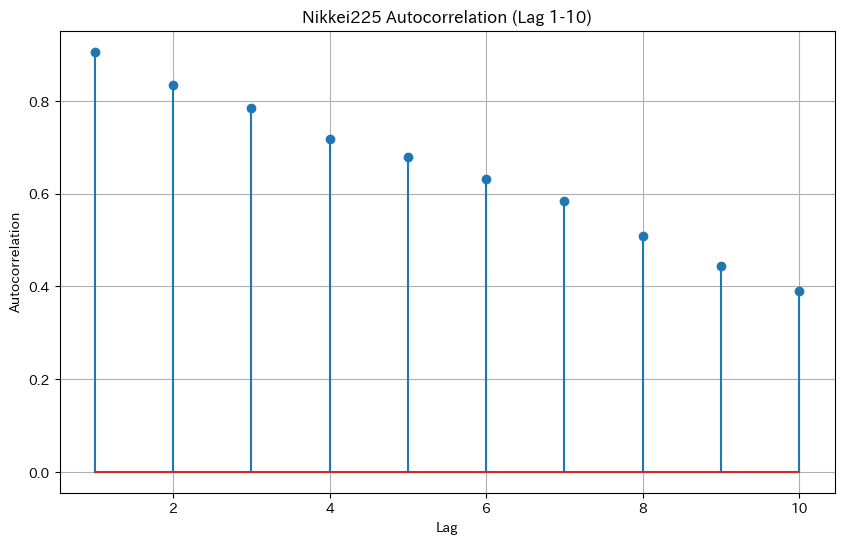

In [ ]:
# prompt: Nikkei225のラグ１〜ラグ１０までのコレグラムを描く．

import matplotlib.pyplot as plt

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# ラグを格納するリスト
lags = range(1, 11)

# コレログラムのプロット
plt.figure(figsize=(10, 6))
plt.stem(lags, acf_values[1:]) #ラグ0を除外してプロット
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Nikkei225 Autocorrelation (Lag 1-10)")
plt.grid(True)
plt.show()


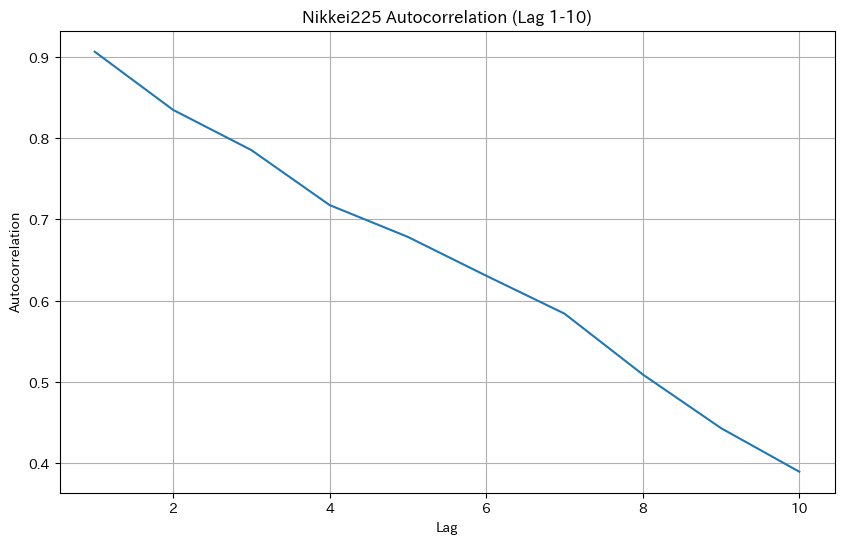

In [ ]:
# prompt: 上のNikkei225コレログラムを，各自己相関係数の値を結んだグラフにする．

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# ラグを格納するリスト
lags = range(1, 11)

# 自己相関係数の値を結んだグラフのプロット
plt.figure(figsize=(10, 6))
plt.plot(lags, acf_values[1:]) #ラグ0を除外してプロット
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Nikkei225 Autocorrelation (Lag 1-10)")
plt.grid(True)
plt.show()


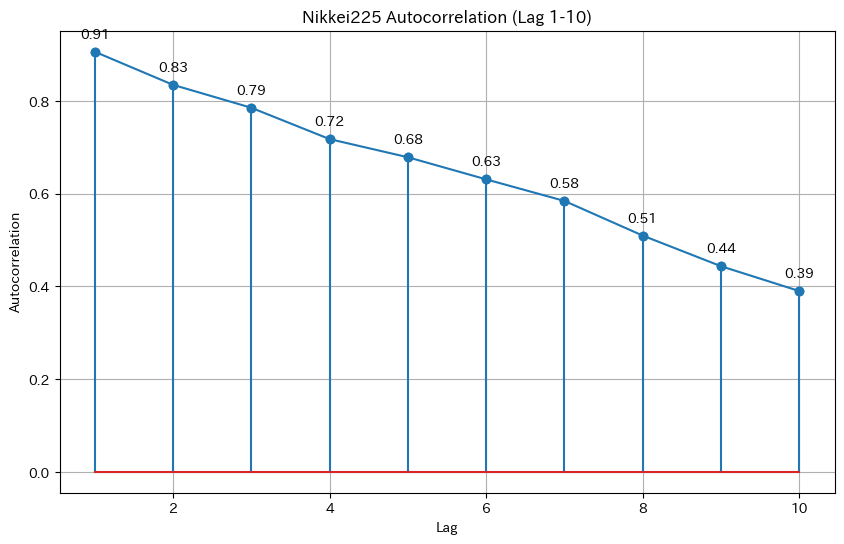

In [ ]:
# prompt: 上のNikkei225コレログラムで，各自己相関係数の値を点で強調する．加えて，書く自己相関係数の値を線で結ぶ．

# 自己相関係数の計算 (ラグ1～10)
acf_values = acf(df["Nikkei225"], nlags=10)

# ラグを格納するリスト
lags = range(1, 11)

# コレログラムのプロット
plt.figure(figsize=(10, 6))
plt.stem(lags, acf_values[1:])  # ラグ0を除外してプロット
plt.plot(lags, acf_values[1:], marker='o') # 自己相関係数の値を結んだ線を追加

# 各自己相関係数の値を点で強調
for lag, acf_value in enumerate(acf_values[1:]):
    plt.annotate(f"{acf_value:.2f}", (lag + 1, acf_value), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Nikkei225 Autocorrelation (Lag 1-10)")
plt.grid(True)
plt.show()


In [ ]:
# prompt: yahoo financeから2020年1月〜2020年12月までの月次終値，日経平均株価と米ドル円為替レートを取得してデータ・フレームにする．

import yfinance as yf
import pandas as pd

# 日経平均株価のティッカーシンボル
nikkei_ticker = "^N225"

# 米ドル円の為替レートのティッカーシンボル
usd_jpy_ticker = "USDJPY=X"

# データ取得期間
start_date = "2020-01-01"
end_date = "2020-12-31"

# データ取得
nikkei_data = yf.download(nikkei_ticker, start=start_date, end=end_date, interval="1mo")
usd_jpy_data = yf.download(usd_jpy_ticker, start=start_date, end=end_date, interval="1mo")

# 月末の終値のみを抽出
# Access 'Adj Close' using MultiIndex if it exists
try:
    nikkei_monthly = nikkei_data[('Adj Close', nikkei_ticker)].resample("M").last()
    usd_jpy_monthly = usd_jpy_data[('Adj Close', usd_jpy_ticker)].resample("M").last()
except KeyError:
    # Fallback to 'Close' if 'Adj Close' is not in MultiIndex
    nikkei_monthly = nikkei_data["Close"].resample("M").last()
    usd_jpy_monthly = usd_jpy_data["Close"].resample("M").last()

# データフレームの作成
# nikkei_monthly and usd_jpy_monthly's index is used as the DataFrame's index
# Convert nikkei_monthly and usd_jpy_monthly to Series by squeezing
df = pd.DataFrame({
    "Nikkei225": nikkei_monthly.squeeze(),  # Convert to Series
    "USDJPY": usd_jpy_monthly.squeeze()   # Convert to Series
}, index=nikkei_monthly.index) # Pass the index explicitly


# 結果の表示
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-87-78c4f4f98b50>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  nikkei_monthly = nikkei_data["Close"].resample("M").last()
<ipython-input-87-78c4f4f98b50>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usd_jpy_monthly = usd_jpy_data["Close"].resample("M").last()


,Nikkei225,USDJPY
Date,,
2020-01-31,23205.179688,108.876999
2020-02-29,21142.960938,108.136002
2020-03-31,18917.009766,108.035004
2020-04-30,20193.689453,106.610001
2020-05-31,21877.890625,107.760002
2020-06-30,22288.140625,107.589996
2020-07-31,21710.000000,104.682999
2020-08-31,23139.759766,105.535004
2020-09-30,23185.119141,105.664001


In [ ]:
# prompt: USDJPYをNikkei225に線形回帰したときの回帰係数と決定係数を求める．

import statsmodels.api as sm

# 線形回帰モデルの作成
X = df["USDJPY"]
y = df["Nikkei225"]
X = sm.add_constant(X)  # 定数項を追加
model = sm.OLS(y, X)
results = model.fit()

# 回帰係数と決定係数の表示
print(results.summary())

# 回帰係数
coefficient = results.params["USDJPY"]
print(f"回帰係数: {coefficient}")

# 決定係数
r_squared = results.rsquared
print(f"決定係数: {r_squared}")


                            OLS Regression Results                            
Dep. Variable:              Nikkei225   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     8.863
Date:                Sun, 13 Apr 2025   Prob (F-statistic):             0.0139
Time:                        05:26:59   Log-Likelihood:                -105.97
No. Observations:                  12   AIC:                             215.9
Df Residuals:                      10   BIC:                             216.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+05    3.1e+04      3.708      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


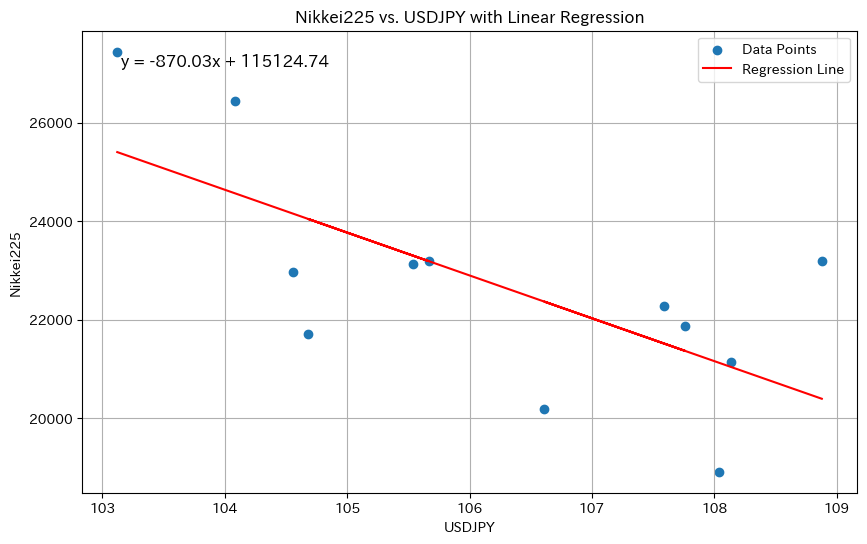

In [ ]:
# prompt: Nikkei225とUSDJPYの散布図に線形回帰式を加えたグラフを描く．

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'df' DataFrame from the previous code block is available

# 線形回帰モデルの作成
X = df["USDJPY"]
y = df["Nikkei225"]
X = sm.add_constant(X)  # 定数項を追加
model = sm.OLS(y, X)
results = model.fit()

# 散布図の作成
plt.figure(figsize=(10, 6))
plt.scatter(df["USDJPY"], df["Nikkei225"], label="Data Points")

# 回帰直線の描画
plt.plot(df["USDJPY"], results.fittedvalues, color="red", label="Regression Line")

# グラフの装飾
plt.xlabel("USDJPY")
plt.ylabel("Nikkei225")
plt.title("Nikkei225 vs. USDJPY with Linear Regression")
plt.legend()
plt.grid(True)

# 回帰式を表示
plt.text(0.05, 0.95, f"y = {results.params['USDJPY']:.2f}x + {results.params['const']:.2f}",
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.show()
